In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:


# para que salga el grafico
%matplotlib inline

In [3]:
arbnb_sql2 = pd.read_csv('../w4-ETL-Project/final_docs_to_sql/total_arbnb_final.csv')
arbnb_sql2.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,host_id,host_url,host_name,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,sq_meters,price_monthly,price_sqm_amonth,last_scraped_month,postal_codes
0,0,11547,https://www.airbnb.com/rooms/11547,20220314155457,2022-03-14,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",42942,https://www.airbnb.com/users/show/42942,Daniel,2009-10-02,"Balearic Islands, Spain",89%,f,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,NaN,Calvia,39.51888,2.48182,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,91.0,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,17,44,74,283,2022-03-14,112,9,0,2011-08-23,2021-09-08,4.83,4.92,4.58,4.92,4.93,4.79,4.77,NaN,f,1,1,0.87,50,2730.0,54.60000,2022-03,7184
1,1,69998,https://www.airbnb.com/rooms/69998,20220314155457,2022-03-15,COZY HIDEAWAY LOFT... MI AMOR...,Perfect place to escape for a few days of peac...,353156,https://www.airbnb.com/users/show/353156,Lor,2011-01-19,"Palma de Mallorca, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,39.56656,2.65244,Entire loft,Entire home/apt,2,1 bath,1.0,1.0,87.0,3,90,2.0,3.0,1125.0,1125.0,3.0,1125.0,t,7,26,50,208,2022-03-15,197,36,1,2012-01-24,2022-02-22,4.93,4.91,4.92,4.94,4.95,4.86,4.77,NaN,f,2,2,1.60,50,2610.0,52.20000,2022-03,7001
2,2,100831,https://www.airbnb.com/rooms/100831,20220314155457,2022-03-15,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,529151,https://www.airbnb.com/users/show/529151,Miguel,2011-04-23,Mallorca,NaN,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,NaN,Santa Margalida,39.76347,3.16255,Entire residential home,Entire home/apt,8,3 baths,4.0,7.0,155.0,7,365,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,0,0,0,204,2022-03-15,21,0,0,2011-07-20,2019-09-22,4.95,4.95,4.95,5.00,4.90,4.71,4.86,ETV-3045,f,1,1,0.16,120,4650.0,38.75000,2022-03,7450
3,3,105891,https://www.airbnb.com/rooms/105891,20220314155457,2022-03-14,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is equipped with the furniture and e...,549192,https://www.airbnb.com/users/show/549192,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Maria de la Salut, Balearic Islands, Spain",Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,4,2 baths,3.0,4.0,110.0,6,365,6.0,6.0,1125.0,1125.0,6.0,1125.0,t,18,24,41,67,2022-03-14,15,1,0,2012-06-19,2021-08-29,4.86,4.93,5.00,4.86,4.93,4.71,4.93,ETV/6127,f,1,1,0.13,85,3300.0,38.82353,2022-03,7519
4,4,106833,https://www.airbnb.com/rooms/106833,20220314155457,2022-03-14,Villa with a big pool in Mallorca,<b>The space</b><br />This is a restored old b...,551974,https://www.airbnb.com/users/show/551974,Xisco,2011-05-02,"Palma, Balearic Islands, Spain",67%,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,NaN,Lloret de Vistalegre,39.61600,3.30121,Entire villa,Entire home/apt,4,1 bath,2.0,4.0,200.0,5,365,5.0,5.0,365.0,365.0,5.0,365.0,t,23,46,70,291,2022-03-14,9,0,0,2012-06-05,2018-08-13,4.89,4.7

In [4]:
arbnb_sql2 = arbnb_sql2.replace([np.inf, -np.inf], np.nan)
arbnb_sql2 = arbnb_sql2.fillna(0)

In [5]:
arbnb_sql2.shape

(69014, 64)

In [6]:
arbnb_sql2.dropna(subset = ['price'])


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,host_id,host_url,host_name,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,sq_meters,price_monthly,price_sqm_amonth,last_scraped_month,postal_codes
0,0,11547,https://www.airbnb.com/rooms/11547,20220314155457,2022-03-14,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",42942,https://www.airbnb.com/users/show/42942,Daniel,2009-10-02,"Balearic Islands, Spain",89%,f,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,0,Calvia,39.51888,2.48182,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,91.0,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,17,44,74,283,2022-03-14,112,9,0,2011-08-23,2021-09-08,4.83,4.92,4.58,4.92,4.93,4.79,4.77,0,f,1,1,0.87,50,2730.0,54.60000,2022-03,7184
1,1,69998,https://www.airbnb.com/rooms/69998,20220314155457,2022-03-15,COZY HIDEAWAY LOFT... MI AMOR...,Perfect place to escape for a few days of peac...,353156,https://www.airbnb.com/users/show/353156,Lor,2011-01-19,"Palma de Mallorca, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,39.56656,2.65244,Entire loft,Entire home/apt,2,1 bath,1.0,1.0,87.0,3,90,2.0,3.0,1125.0,1125.0,3.0,1125.0,t,7,26,50,208,2022-03-15,197,36,1,2012-01-24,2022-02-22,4.93,4.91,4.92,4.94,4.95,4.86,4.77,0,f,2,2,1.60,50,2610.0,52.20000,2022-03,7001
2,2,100831,https://www.airbnb.com/rooms/100831,20220314155457,2022-03-15,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,529151,https://www.airbnb.com/users/show/529151,Miguel,2011-04-23,Mallorca,0,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,0,Santa Margalida,39.76347,3.16255,Entire residential home,Entire home/apt,8,3 baths,4.0,7.0,155.0,7,365,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,0,0,0,204,2022-03-15,21,0,0,2011-07-20,2019-09-22,4.95,4.95,4.95,5.00,4.90,4.71,4.86,ETV-3045,f,1,1,0.16,120,4650.0,38.75000,2022-03,7450
3,3,105891,https://www.airbnb.com/rooms/105891,20220314155457,2022-03-14,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is equipped with the furniture and e...,549192,https://www.airbnb.com/users/show/549192,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Maria de la Salut, Balearic Islands, Spain",Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,4,2 baths,3.0,4.0,110.0,6,365,6.0,6.0,1125.0,1125.0,6.0,1125.0,t,18,24,41,67,2022-03-14,15,1,0,2012-06-19,2021-08-29,4.86,4.93,5.00,4.86,4.93,4.71,4.93,ETV/6127,f,1,1,0.13,85,3300.0,38.82353,2022-03,7519
4,4,106833,https://www.airbnb.com/rooms/106833,20220314155457,2022-03-14,Villa with a big pool in Mallorca,<b>The space</b><br />This is a restored old b...,551974,https://www.airbnb.com/users/show/551974,Xisco,2011-05-02,"Palma, Balearic Islands, Spain",67%,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,0,Lloret de Vistalegre,39.61600,3.30121,Entire villa,Entire home/apt,4,1 bath,2.0,4.0,200.0,5,365,5.0,5.0,365.0,365.0,5.0,365.0,t,23,46,70,291,2022-03-14,9,0,0,2012-06-05,2018-08-13,4.89,4.78,4.78,4.89,

In [7]:
arbnb_sql2.dropna(subset=['price'], inplace=True)


In [8]:
arbnb_sql2.dropna(subset=['price_sqm_amonth'], inplace=True)


In [9]:
arbnb_sql2['price_sqm_amonth']

0         54.60000
1         52.20000
2         38.75000
3         38.82353
4        120.00000
           ...    
69009     99.50000
69010     15.00000
69011     74.47059
69012    117.00000
69013     51.00000
Name: price_sqm_amonth, Length: 69014, dtype: float64

In [10]:
arbnb_sql2.dtypes['price']

dtype('float64')

In [11]:
arbnb_sql2.shape

(69014, 64)

In [12]:
nan_cols = arbnb_sql2.isnull().sum()
nan_cols


Unnamed: 0            0
id                    0
listing_url           0
scrape_id             0
last_scraped          0
                     ..
sq_meters             0
price_monthly         0
price_sqm_amonth      0
last_scraped_month    0
postal_codes          0
Length: 64, dtype: int64

In [13]:
max (arbnb_sql2.price)

90000.0

In [14]:
['price','review_scores_rating','number_of_reviews','price_monthly','price_sqm_amonth' ]

['price',
 'review_scores_rating',
 'number_of_reviews',
 'price_monthly',
 'price_sqm_amonth']

In [15]:
stats = arbnb_sql2.describe().T

stats['IQR'] = stats['75%']-stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
Unnamed: 0,69014.0,9.027205e+03,5.206539e+03,0.000000e+00,4.507000e+03,9.044000e+03,1.352875e+04,1.830800e+04,9.021750e+03
id,69014.0,2.372491e+16,1.156852e+17,1.154700e+04,1.900983e+07,3.398135e+07,4.798510e+07,6.456002e+17,2.897528e+07
scrape_id,69014.0,2.021577e+13,4.704320e+09,2.021091e+13,2.021091e+13,2.022031e+13,2.022061e+13,2.022061e+13,9.695848e+09
host_id,69014.0,1.329733e+08,1.241988e+08,4.294200e+04,2.601533e+07,8.861088e+07,2.054968e+08,4.632323e+08,1.794815e+08
host_total_listings_count,69014.0,1.262637e+02,2.305136e+02,0.000000e+00,1.000000e+00,1.000000e+01,1.340000e+02,2.241000e+03,1.330000e+02
latitude,69014.0,3.966357e+01,1.684045e-01,3.930197e+01,3.954568e+01,3.968527e+01,3.981573e+01,3.992947e+01,2.700500e-01
longitude,69014.0,2.998444e+00,2.433262e-01,2.346610e+00,2.840830e+00,3.051380e+00,3.144918e+00,3.475520e+00,3.040875e-01
accommodates,69014.0,5.631524e+00,2.549553e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,1.600000e+01,4.000000e+00
bedrooms,69014.0,2.792607e+00,1.345788e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.000000e+00
beds,69014.0,4.180210e+00,2.277624e+00,0.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,3.000000e+01,2.000000e+00


<AxesSubplot:>

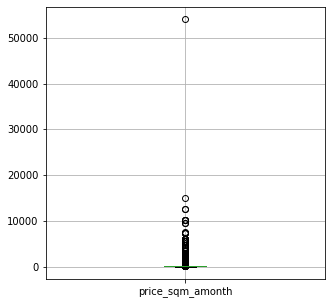

In [16]:
arbnb_sql2[['price_sqm_amonth']].boxplot(figsize=(5,5))

In [17]:
arbnb_sql2.property_type.value_counts()


Entire villa                          19994
Entire rental unit                    13565
Entire residential home               13129
Entire home                            4628
Entire cottage                         3493
                                      ...  
Bus                                       1
Private room in minsu                     1
Private room in island                    1
Shared room in condominium (condo)        1
Shared room in guesthouse                 1
Name: property_type, Length: 93, dtype: int64

In [18]:
arbnb_sql2.license.value_counts()


0             26428
A/1748          206
A-PM-2176        60
AG/049           56
2.20€            53
              ...  
VT457             1
ET 3422 ME        1
ET3747            1
VT / 1650         1
ETV/7706          1
Name: license, Length: 10338, dtype: int64

In [19]:
#quizas a esta podamos hacerle una mediana ( hay 22205 reviews vacias, realmente no tiene sentido rellenarlas si quiero usarlas)

arbnb_sql2.review_scores_rating	.value_counts()


0.00    22408
5.00    14918
4.00     2690
4.50     2315
4.67     1886
        ...  
3.77        1
3.65        1
2.75        1
3.81        1
3.11        1
Name: review_scores_rating, Length: 169, dtype: int64

In [20]:
arbnb_sql2.review_scores_rating.dtype

dtype('float64')

In [21]:
arbnb_sql2.bathrooms_text.dtypes

dtype('O')

In [22]:
arbnb_sql2.bathrooms_text.unique()


array(['1 bath', '3 baths', '2 baths', '1 private bath', '0 baths',
       '1.5 baths', '2 shared baths', '4.5 baths', '2.5 baths', '4 baths',
       'Shared half-bath', '1.5 shared baths', '3.5 baths', '5.5 baths',
       '1 shared bath', '6 baths', 0, '7 baths', '5 baths', '8.5 baths',
       '6.5 baths', '7.5 baths', '9.5 baths', '4 shared baths', '8 baths',
       'Half-bath', '0 shared baths', '11 baths', '3.5 shared baths',
       '2.5 shared baths', '9 baths', '11.5 baths', '3 shared baths',
       '10 baths', 'Private half-bath', '10.5 baths'], dtype=object)

In [23]:
arbnb_sql2['bathrooms_text'] = arbnb_sql2['bathrooms_text'].astype(str)

In [24]:
arbnb_sql2.bathrooms_text.dtypes

dtype('O')

In [25]:
# lista de los municipios y como deberian quedar

bathroom_types=[]

for i in arbnb_sql2.bathrooms_text:
    if i.find("bath") ==0:
        bathroom_types.append("baths")
    elif i.find("baths") ==0:
        bathroom_types.append("baths")
    elif i.find("private") ==0:
        bathroom_types.append("private bath")
    elif i.find("shared") ==0:
        bathroom_types.append("shared bath")
    elif i.find("half-") ==0:
        bathroom_types.append("half bath")
    elif i.find("Shared ") ==0:
        bathroom_types.append("shared bath")
 
    else:
        bathroom_types.append(i)

arbnb_sql2["bathroom_types"] = bathroom_types

In [31]:
new = arbnb_sql2["bathroom_types"].str.split(" ", n = 1, expand = True)


In [32]:
arbnb_sql2["number_bathroom"]= new[0]


In [33]:
arbnb_sql2["type_bathroom_fin"]= new[1]


In [34]:
arbnb_sql2.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,host_id,host_url,host_name,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,sq_meters,price_monthly,price_sqm_amonth,last_scraped_month,postal_codes,bathroom_types,number_bathroom,type_bathroom_fin
0,0,11547,https://www.airbnb.com/rooms/11547,20220314155457,2022-03-14,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",42942,https://www.airbnb.com/users/show/42942,Daniel,2009-10-02,"Balearic Islands, Spain",89%,f,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,0,Calvia,39.51888,2.48182,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,91.0,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,17,44,74,283,2022-03-14,112,9,0,2011-08-23,2021-09-08,4.83,4.92,4.58,4.92,4.93,4.79,4.77,0,f,1,1,0.87,50,2730.0,54.60000,2022-03,7184,1 bath,1,bath
1,1,69998,https://www.airbnb.com/rooms/69998,20220314155457,2022-03-15,COZY HIDEAWAY LOFT... MI AMOR...,Perfect place to escape for a few days of peac...,353156,https://www.airbnb.com/users/show/353156,Lor,2011-01-19,"Palma de Mallorca, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,39.56656,2.65244,Entire loft,Entire home/apt,2,1 bath,1.0,1.0,87.0,3,90,2.0,3.0,1125.0,1125.0,3.0,1125.0,t,7,26,50,208,2022-03-15,197,36,1,2012-01-24,2022-02-22,4.93,4.91,4.92,4.94,4.95,4.86,4.77,0,f,2,2,1.60,50,2610.0,52.20000,2022-03,7001,1 bath,1,bath
2,2,100831,https://www.airbnb.com/rooms/100831,20220314155457,2022-03-15,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,529151,https://www.airbnb.com/users/show/529151,Miguel,2011-04-23,Mallorca,0,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,0,Santa Margalida,39.76347,3.16255,Entire residential home,Entire home/apt,8,3 baths,4.0,7.0,155.0,7,365,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,0,0,0,204,2022-03-15,21,0,0,2011-07-20,2019-09-22,4.95,4.95,4.95,5.00,4.90,4.71,4.86,ETV-3045,f,1,1,0.16,120,4650.0,38.75000,2022-03,7450,3 baths,3,baths
3,3,105891,https://www.airbnb.com/rooms/105891,20220314155457,2022-03-14,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is equipped with the furniture and e...,549192,https://www.airbnb.com/users/show/549192,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Maria de la Salut, Balearic Islands, Spain",Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,4,2 baths,3.0,4.0,110.0,6,365,6.0,6.0,1125.0,1125.0,6.0,1125.0,t,18,24,41,67,2022-03-14,15,1,0,2012-06-19,2021-08-29,4.86,4.93,5.00,4.86,4.93,4.71,4.93,ETV/6127,f,1,1,0.13,85,3300.0,38.82353,2022-03,7519,2 baths,2,baths
4,4,106833,https://www.airbnb.com/rooms/106833,20220314155457,2022-03-14,Villa with a big pool in Mallorca,<b>The space</b><br />This is a restored old b...,551974,https://www.airbnb.com/users/show/551974,Xisco,2011-05-02,"Palma, Balearic Islands, Spain",67%,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,0,Lloret de Vistalegre,39.61600,3.30121,Entire villa,Entire home/apt,4,1 bath,2.0,4.0,200.0,5

In [36]:
arbnb_sql2.type_bathroom_fin.value_counts()

baths           47027
bath            16937
private bath     2331
shared bath      1866
shared baths      715
half-bath           4
Name: type_bathroom_fin, dtype: int64

In [37]:
arbnb_sql2.drop(columns =["bathroom_types"], inplace = True)


In [38]:
arbnb_sql2.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,host_id,host_url,host_name,host_since,host_location,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,sq_meters,price_monthly,price_sqm_amonth,last_scraped_month,postal_codes,number_bathroom,type_bathroom_fin
0,0,11547,https://www.airbnb.com/rooms/11547,20220314155457,2022-03-14,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",42942,https://www.airbnb.com/users/show/42942,Daniel,2009-10-02,"Balearic Islands, Spain",89%,f,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,0,Calvia,39.51888,2.48182,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,91.0,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,17,44,74,283,2022-03-14,112,9,0,2011-08-23,2021-09-08,4.83,4.92,4.58,4.92,4.93,4.79,4.77,0,f,1,1,0.87,50,2730.0,54.60000,2022-03,7184,1,bath
1,1,69998,https://www.airbnb.com/rooms/69998,20220314155457,2022-03-15,COZY HIDEAWAY LOFT... MI AMOR...,Perfect place to escape for a few days of peac...,353156,https://www.airbnb.com/users/show/353156,Lor,2011-01-19,"Palma de Mallorca, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,39.56656,2.65244,Entire loft,Entire home/apt,2,1 bath,1.0,1.0,87.0,3,90,2.0,3.0,1125.0,1125.0,3.0,1125.0,t,7,26,50,208,2022-03-15,197,36,1,2012-01-24,2022-02-22,4.93,4.91,4.92,4.94,4.95,4.86,4.77,0,f,2,2,1.60,50,2610.0,52.20000,2022-03,7001,1,bath
2,2,100831,https://www.airbnb.com/rooms/100831,20220314155457,2022-03-15,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,529151,https://www.airbnb.com/users/show/529151,Miguel,2011-04-23,Mallorca,0,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,0,Santa Margalida,39.76347,3.16255,Entire residential home,Entire home/apt,8,3 baths,4.0,7.0,155.0,7,365,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,0,0,0,204,2022-03-15,21,0,0,2011-07-20,2019-09-22,4.95,4.95,4.95,5.00,4.90,4.71,4.86,ETV-3045,f,1,1,0.16,120,4650.0,38.75000,2022-03,7450,3,baths
3,3,105891,https://www.airbnb.com/rooms/105891,20220314155457,2022-03-14,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is equipped with the furniture and e...,549192,https://www.airbnb.com/users/show/549192,Bartomeu,2011-05-01,"Ariany, Balearic Islands, Spain",100%,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Maria de la Salut, Balearic Islands, Spain",Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,4,2 baths,3.0,4.0,110.0,6,365,6.0,6.0,1125.0,1125.0,6.0,1125.0,t,18,24,41,67,2022-03-14,15,1,0,2012-06-19,2021-08-29,4.86,4.93,5.00,4.86,4.93,4.71,4.93,ETV/6127,f,1,1,0.13,85,3300.0,38.82353,2022-03,7519,2,baths
4,4,106833,https://www.airbnb.com/rooms/106833,20220314155457,2022-03-14,Villa with a big pool in Mallorca,<b>The space</b><br />This is a restored old b...,551974,https://www.airbnb.com/users/show/551974,Xisco,2011-05-02,"Palma, Balearic Islands, Spain",67%,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,0,Lloret de Vistalegre,39.61600,3.30121,Entire villa,Entire home/apt,4,1 bath,2.0,4.0,200.0,5,365,5.0,5.0,365.0,365.0,5.0,365.0,t,23,46,70